# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Data

In [3]:
df=pd.read_csv('RELIANCE.NS.csv')

In [4]:
df.shape

(63, 7)

** Get and print the last row of data**

In [5]:
Actual_price=df.tail(1)
Actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
62,2023-08-18,2531.25,2577.600098,2508.550049,2556.800049,2547.800049,9319989


#Prepare the data for training the SVR models

In [6]:
#get all the the row except last row
df_new=df.head(len(df)-1)
df_new

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-22,2435.000000,2466.000000,2432.350098,2455.000000,2446.358398,3431208
1,2023-05-23,2460.649902,2468.000000,2451.449951,2454.550049,2445.909912,2811473
2,2023-05-24,2445.899902,2464.000000,2433.449951,2440.250000,2431.660400,3743804
3,2023-05-25,2433.899902,2449.000000,2416.050049,2439.949951,2431.361328,5301647
4,2023-05-26,2458.000000,2509.000000,2450.750000,2506.500000,2497.677002,5827017
...,...,...,...,...,...,...,...
57,2023-08-10,2524.949951,2550.000000,2508.449951,2536.449951,2527.521729,7735299
58,2023-08-11,2532.449951,2558.850098,2512.350098,2547.149902,2538.183838,11089665
59,2023-08-14,2539.000000,2582.300049,2525.000000,2577.250000,2568.177979,4787906
60,2023-08-16,2551.000000,2582.800049,2551.000000,2575.149902,2566.085449,5101556


Create empty lists to store the independent and dependent data

In [7]:
days=[]
adj_close_price=[]

In [8]:
#Get the dates and Adj_close price
df_days=df_new['Date']
df_adjcls=df_new['Adj Close']

In [9]:
df_days

0     2023-05-22
1     2023-05-23
2     2023-05-24
3     2023-05-25
4     2023-05-26
         ...    
57    2023-08-10
58    2023-08-11
59    2023-08-14
60    2023-08-16
61    2023-08-17
Name: Date, Length: 62, dtype: object

In [10]:
##create an independent dataset

for day in df_days:
  days.append([int(day.split('-')[2])])

#create a dependent dataset
for df_adj in df_adjcls:
  adj_close_price.append(float(df_adj))

In [12]:
days

[[22],
 [23],
 [24],
 [25],
 [26],
 [29],
 [30],
 [31],
 [1],
 [2],
 [5],
 [6],
 [7],
 [8],
 [9],
 [12],
 [13],
 [14],
 [15],
 [16],
 [19],
 [20],
 [21],
 [22],
 [23],
 [26],
 [27],
 [28],
 [30],
 [3],
 [4],
 [5],
 [6],
 [7],
 [10],
 [11],
 [12],
 [13],
 [14],
 [17],
 [18],
 [19],
 [20],
 [21],
 [24],
 [25],
 [26],
 [27],
 [28],
 [31],
 [1],
 [2],
 [3],
 [4],
 [7],
 [8],
 [9],
 [10],
 [11],
 [14],
 [16],
 [17]]

In [13]:
days=days[8:29]
adj_close_price=adj_close_price[8:29]

In [14]:
print(days)
print(adj_close_price)

[[1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [30]]
[2454.579346, 2446.557617, 2468.530029, 2470.622803, 2489.356445, 2490.851074, 2473.213379, 2475.405762, 2511.976563, 2542.867676, 2543.564941, 2568.327393, 2542.817627, 2548.099121, 2555.273682, 2526.574951, 2505.897949, 2486.765625, 2487.662354, 2487.662354, 2541.273193]


In [15]:
len(days)

21

** Get and print the last row of data**

In [16]:
new_day=days[:-1]
new_price=adj_close_price[:-1]

In [17]:
actual_price=adj_close_price[-1]

In [19]:
actual_price

2541.273193

In [20]:
print(new_day)
print(new_price)

[[1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28]]
[2454.579346, 2446.557617, 2468.530029, 2470.622803, 2489.356445, 2490.851074, 2473.213379, 2475.405762, 2511.976563, 2542.867676, 2543.564941, 2568.327393, 2542.817627, 2548.099121, 2555.273682, 2526.574951, 2505.897949, 2486.765625, 2487.662354, 2487.662354]


# Model Training and Prediction

In [22]:
from sklearn.svm import SVR

#1) create and train a SVR model using linear Kernel
svr_lin = SVR(kernel = 'linear', C = 1e3, gamma = 'auto')
svr_lin.fit(new_day,new_price)
#2) create and train a SVR model using polynomial Kernel
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2, gamma = 'auto')
svr_poly.fit(new_day,new_price)
#3) create and train a SVR model using rbf Kernel
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
svr_rbf.fit(new_day,new_price)

SVR(C=1000.0, gamma=0.1)

# Plot the models on a graph to see which has the best fit to the original

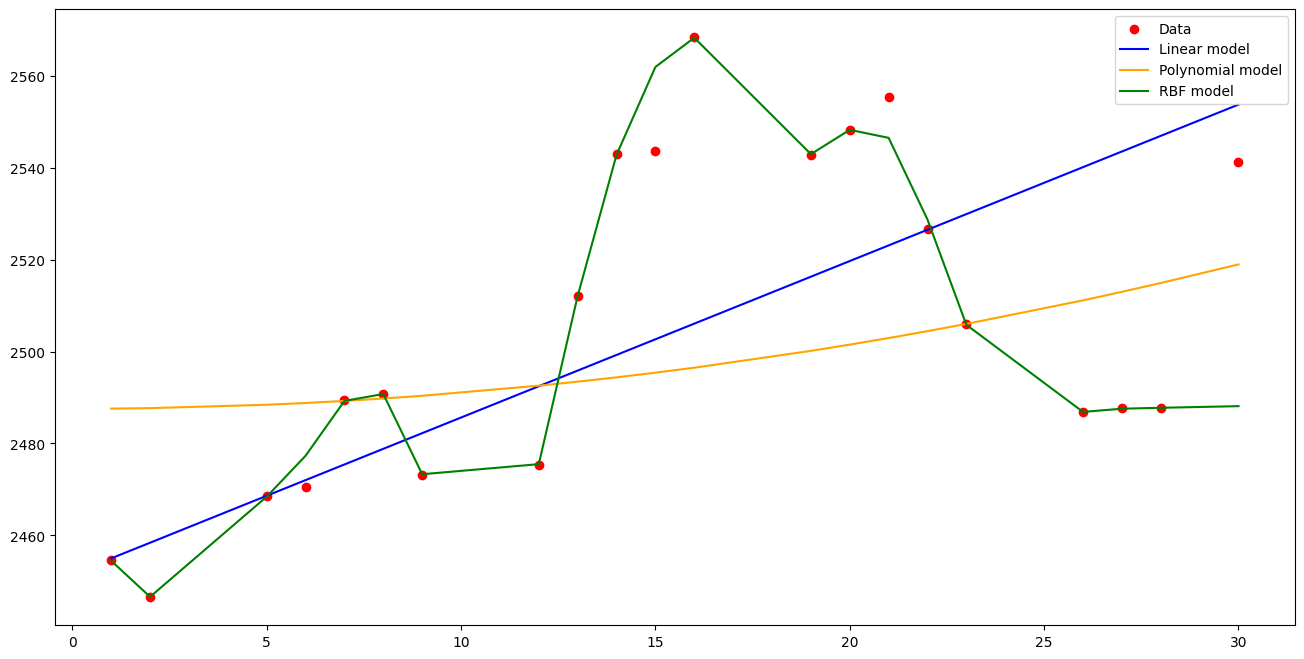

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(days,adj_close_price,color='red',label='Data')
plt.plot(days,svr_lin.predict(days),color='blue',label='Linear model')
plt.plot(days,svr_poly.predict(days),color='orange',label='Polynomial model')
plt.plot(days,svr_rbf.predict(days),color='green',label='RBF model')
plt.legend()

# Show the predicted price for the given day

In [24]:
day_30=[[30]]

print('RBF SVR predicted value:',svr_rbf.predict(day_30))
print('ploy SVR predicted value:',svr_poly.predict(day_30))
print('linear SVR predicted value:',svr_lin.predict(day_30))

RBF SVR predicted value: [2488.11598951]
ploy SVR predicted value: [2518.93773674]
linear SVR predicted value: [2553.69609076]


In [26]:
# Actual price of the stock on day 30
print("Actual price of the stock on day 30 is : ",actual_price)

Actual price of the stock on day 30 is :  2541.273193


The RBF (Radial Basis Function) SVR model predicts that the stock price on day 30 will be around 2488.12.
The Polynomial SVR model predicts a slightly higher stock price of approximately 2518.94 for day 30.
The Linear SVR model predicts the highest stock price of about 2553.70 for the same day.



when comparing these predictions to the actual stock price on day 30, which is 2541.27, we can see that all three models had varying degrees of deviation from the actual price. This demonstrates the challenges of predicting stock prices accurately, especially in highly volatile financial markets.